In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
%cd /content/gdrive/MyDrive

Mounted at /content/gdrive
/content/gdrive/MyDrive


In [ ]:
%cd IA

/content/gdrive/MyDrive/IA


In [ ]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import argparse
from pickle import  load
from keras.models import Model, load_model
from keras.applications.xception import Xception
from keras_preprocessing.sequence import pad_sequences


In [ ]:


def extract_features(filename, model):
        try:
            image = Image.open(filename)
        except:
            print("ERROR: Couldn't open image! Make sure the image path and extension is correct")
        image = image.resize((299,299))
        image = np.array(image)
        # for images that has 4 channels, we convert them into 3 channels
        if image.shape[2] == 4: 
            image = image[..., :3]
        image = np.expand_dims(image, axis=0)
        image = image/127.5
        image = image - 1.0
        feature = model.predict(image)
        return feature
def word_for_id(integer, tokenizer):
  for word, index in tokenizer.word_index.items():
     if index == integer:
         return word
  return None
def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text

1/1 [==============================] - 1s 1s/step



start كلب بني يركض في حقل end


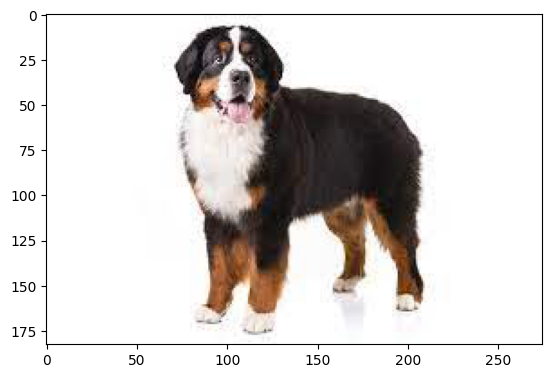

In [ ]:
#changer le variable path pour effectuer le test sur differante image
path = 'téléchargement (1).jpg'
max_length = 24
tokenizer = load(open("tokenizer.p","rb"))
model = load_model('models/model_9.h5')
xception_model = Xception(include_top=False, pooling="avg")
photo = extract_features(path, xception_model)
img = Image.open(path)
description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)

Saving téléchargement.jpg to téléchargement (3).jpg
dict_keys(['téléchargement.jpg'])
1/1 [==============================] - 2s 2s/step



start كلب بني يركض في حقل end


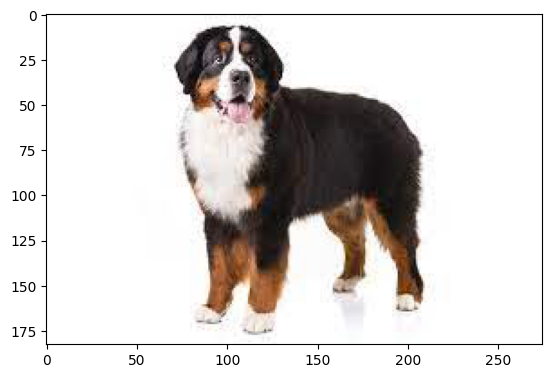

In [ ]:
from google.colab import files
# choisir une image
uploaded = files.upload()
print(uploaded.keys())
for fn in uploaded.keys():
  upload=fn
tokenizer = load(open("tokenizer.p","rb"))

model = load_model('models/model_9.h5')
xception_model = Xception(include_top=False, pooling="avg")

photo = extract_features(upload, xception_model)
img = Image.open(upload)

description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)